In [1]:
import hiive.mdptoolbox 
import numpy as np 
import pandas as pd 

import gym
from gym import wrappers 

import hiive.mdptoolbox 
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import hiive.mdptoolbox.example
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display
# import mdptoolbox, mdptoolbox.example
from gym.envs.toy_text import frozen_lake
import random
from tqdm.notebook import tqdm
from utils import get_score, get_policy, result_plots, result_plots_2, plot_lake, valueIteration, policyIteration, Q_learning, ql_plot_result, plot_forest, valueIteration_v2, policyIteration_v2, Q_learning_v2
import seaborn as sns

%matplotlib inline

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/matplotlib/__init__.py:202: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/matplotlib/backend_bases.py:60: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(PILLOW_VERSION) >= "3.4":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site

In [2]:
seed = 123
np.random.seed(seed)
pd.options.mode.chained_assignment = None

## Frozen Lake 

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 7

 _____ACTION SPACE_____ 

Action Space Shape 4


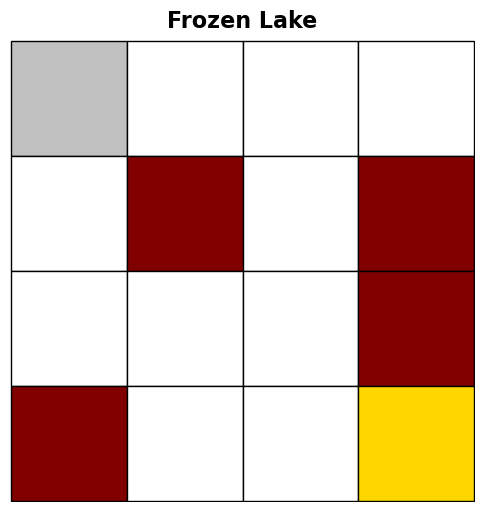

In [6]:
lake_env = gym.make('FrozenLake-v1').unwrapped

lake_env.max_episode_steps=250
plot_lake(lake_env)
# Create transition and reward matrices from OpenAI P matrix
rows = lake_env.nrow
cols = lake_env.ncol
T = np.zeros((4, rows*cols, rows*cols))
R = np.zeros((4, rows*cols, rows*cols))

old_state = np.inf

for square in lake_env.P:
    for action in lake_env.P[square]:
        for i in range(len(lake_env.P[square][action])):
            new_state = lake_env.P[square][action][i][1]
            if new_state == old_state:
                T[action][square][lake_env.P[square][action][i][1]] = T[action][square][old_state] + lake_env.P[square][action][i][0]
                R[action][square][lake_env.P[square][action][i][1]] = R[action][square][old_state] + lake_env.P[square][action][i][2]
            else:
                T[action][square][lake_env.P[square][action][i][1]] = lake_env.P[square][action][i][0]
                R[action][square][lake_env.P[square][action][i][1]] = lake_env.P[square][action][i][2]
            old_state = lake_env.P[square][action][i][1]
            

print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", lake_env.observation_space)
print("Sample observation", lake_env.observation_space.sample())

#### Action Space #####
# 0: GO LEFT
# 1: GO DOWN
# 2: GO RIGHT
# 3: GO UP
#######################

print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", lake_env.action_space.n)

Value Iteration


In [4]:
gammas   = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]
value_iter  = valueIteration(lake_env, rows, cols, T, R, gammas, epsilons, showResults=False)
target = ['gamma', 'epsilon', 'time', 'iterations', 'reward']
vi_df = value_iter[target]

Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.00,	1,	0.333333
0.10,	1E-04,	0.00,	3,	0.345185
0.10,	1E-06,	0.00,	5,	0.345239
0.10,	1E-10,	0.00,	9,	0.345239
0.10,	1E-12,	0.00,	11,	0.345239
0.10,	1E-14,	0.00,	13,	0.345239
0.20,	1E-02,	0.00,	2,	0.355556
0.20,	1E-04,	0.00,	5,	0.358979
0.20,	1E-06,	0.00,	7,	0.358991
0.20,	1E-10,	0.00,	13,	0.358992
0.20,	1E-12,	0.00,	15,	0.358992
0.20,	1E-14,	0.00,	18,	0.358992
0.40,	1E-02,	0.00,	3,	0.389630
0.40,	1E-04,	0.00,	8,	0.394313
0.40,	1E-06,	0.00,	12,	0.394332
0.40,	1E-10,	0.00,	21,	0.394332
0.40,	1E-12,	0.00,	26,	0.394332
0.40,	1E-14,	0.00,	31,	0.394332
0.60,	1E-02,	0.00,	6,	0.445120
0.60,	1E-04,	0.00,	13,	0.447623
0.60,	1E-06,	0.00,	21,	0.447649
0.60,	1E-10,	0.00,	37,	0.447649
0.60,	1E-12,	0.00,	46,	0.447649
0.60,	1E-14,	0.00,	54,	0.447649
0.80,	1E-02,	0.00,	11,	0.540600
0.80,	1E-04,	0.00,	28,	0.544175
0.80,	1E-06,	0.00,	45,	0.544195
0.80,	1E-10,	0.01,	79,	0.544196
0.

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type

Best Result:
	Success = 79.50
	Gamma = 0.90
	Epsilon= 1E-02


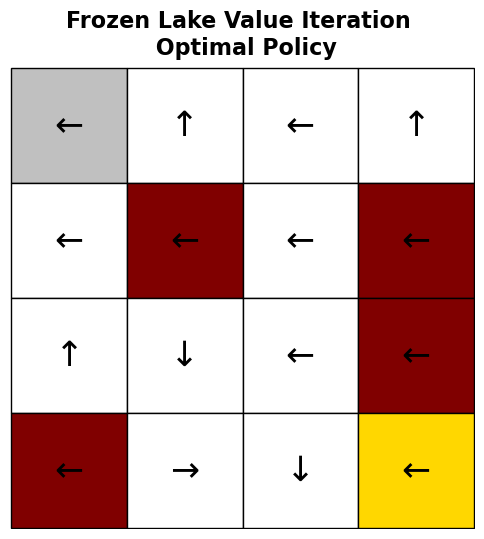

In [5]:

bestRun = value_iter['success_pct'].argmax()
best_policy = value_iter['policy'][bestRun]
best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(rows, cols)

title='Frozen Lake Value Iteration \n Optimal Policy'
plot_lake(lake_env, best_policy, title)
print('Best Result:\n\tSuccess = %.2f\n\tGamma = %.2f\n\tEpsilon= %.E' % (value_iter['success_pct'].max(), 
                                                                          value_iter['gamma'][bestRun], 
                                                                          value_iter['epsilon'][bestRun]))

--------------------------------------------------
Avg_Steps 
 [17.976339610786457, 23.578791068356637, 24.369878374394375, 27.928397916886762, 29.15329557641702, 42.990114398179806]
--------------------------------------------------
Avg_Success 
 [26.73333333333333, 32.949999999999996, 37.96666666666667, 41.0, 45.43333333333334, 78.36666666666666]
--------------------------------------------------
Avg_time 
 [0.0004957914352416992, 0.0007402499516805013, 0.0011309385299682617, 0.0018808444341023762, 0.004114429155985515, 0.00816333293914795]
--------------------------------------------------
Avg_iter 
 [7.0, 10.0, 16.833333333333332, 29.5, 61.666666666666664, 127.66666666666667]


/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
 

<Figure size 1200x1200 with 0 Axes>

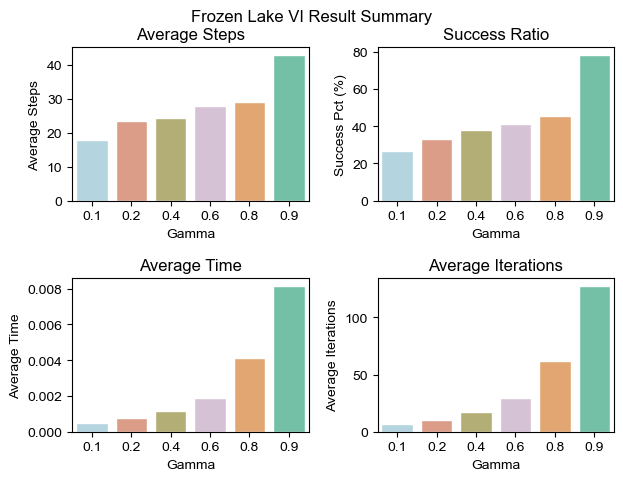

In [6]:
target_name = "Frozen Lake VI Result Summary"
model = 'VI'
result_plots(model, target_name, value_iter, gammas, policy_iter = None)


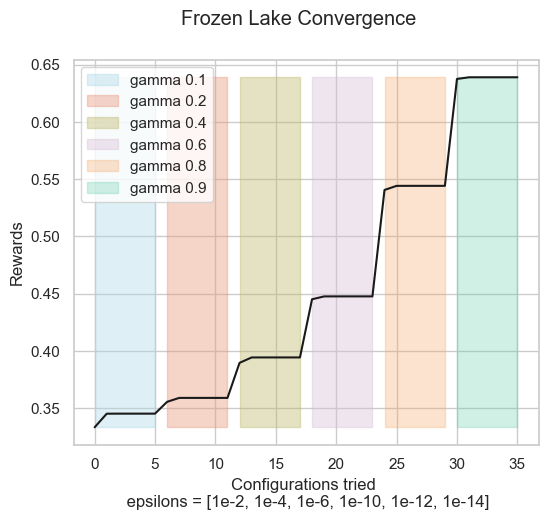

In [7]:
target = value_iter['reward']
custom_color = ['lightblue','darksalmon', 'darkkhaki', 'thistle', 'sandybrown', 'mediumaquamarine']

plt.figure(figsize=(6,5))
plt.plot(target, color = 'k')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.1),  alpha=0.4, color =custom_color[0], label = 'gamma 0.1')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.2),  alpha=0.4, color =custom_color[1], label = 'gamma 0.2')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.4),  alpha=0.4, color =custom_color[2], label = 'gamma 0.4')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.6),  alpha=0.4, color =custom_color[3], label = 'gamma 0.6')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.8),  alpha=0.3, color =custom_color[4], label = 'gamma 0.8')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter['gamma'] == 0.9),  alpha=0.3, color =custom_color[5], label = 'gamma 0.9')
plt.suptitle("Frozen Lake Convergence") 
plt.xlabel('Configurations tried \n epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]')
plt.ylabel('Rewards')
plt.legend()


Policy Iteration

In [17]:
gammas   = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
policy_iter  = policyIteration(lake_env, rows, cols, T, R, gammas, showResults=False)


gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.00,	4,	0.345239
0.20,	0.00,	4,	0.358992
0.30,	0.00,	4,	0.375103
0.40,	0.00,	4,	0.394332
0.50,	0.00,	4,	0.417861
0.60,	0.00,	4,	0.447649
0.70,	0.00,	4,	0.487267
0.80,	0.00,	5,	0.544196
0.90,	0.00,	6,	0.639020
Time taken: 0.03


--------------------------------------------------
Avg_Steps 
 [28.391402714932127, 29.609865470852018, 28.22863741339492, 28.75657894736842, 30.78604651162791, 29.075555555555557, 29.928571428571427, 30.900485436893202, 43.01618929016189]
--------------------------------------------------
Avg_Success 
 [44.199999999999996, 44.599999999999994, 43.300000000000004, 45.599999999999994, 43.00000000000001, 44.99999999999999, 47.599999999999994, 41.2, 80.3]
--------------------------------------------------
Avg_time 
 [0.0027556419372558594, 0.0015799999237060547, 0.0017380714416503906, 0.001741170883178711, 0.0016710758209228516, 0.0014731884002685547, 0.00160980224609375, 0.0018911361694335938, 0.0023109912872314453]
--------------------------------------------------
Avg_iter 
 [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0]
--------------------------------------------------


/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the

<Figure size 1200x1200 with 0 Axes>

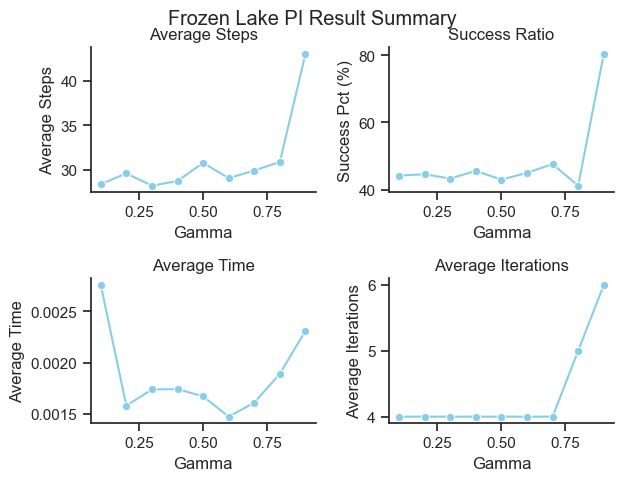

In [18]:
target_name = "Frozen Lake PI Result Summary"
model = 'PI'
result_plots(model, target_name, value_iter=None, gammas=gammas, policy_iter = policy_iter)

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0, 0.5, 'Rewards')

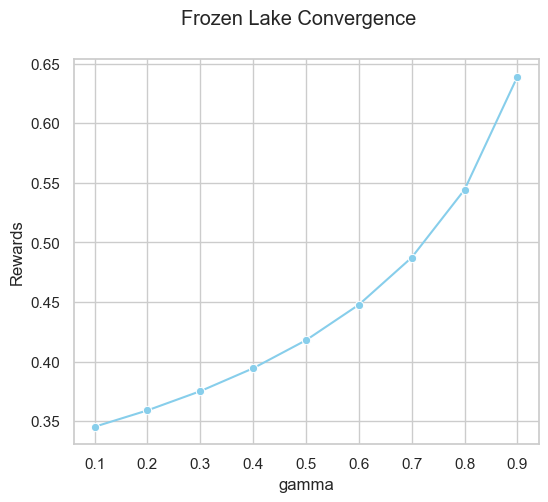

In [43]:
target = policy_iter['reward']
plt.figure(figsize=(6,5))
sns.set(style="whitegrid")
sns.lineplot(x = policy_iter['gamma'], y = target, color = 'skyblue', marker = 'o')
plt.suptitle("Frozen Lake Convergence") 
plt.ylabel('Rewards')

Best Result:
	Success = 80.30
	Gamma = 0.90
	Epsilon= 0E+00


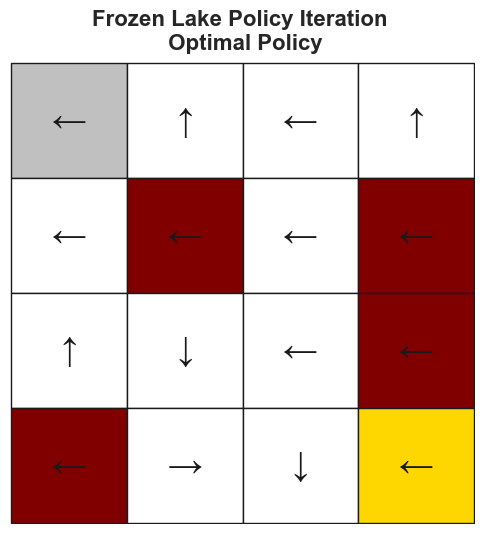

In [44]:
bestRun = policy_iter['success_pct'].argmax()
best_policy = policy_iter['policy'][bestRun]
best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(rows, cols)

title= 'Frozen Lake Policy Iteration \n Optimal Policy'
plot_lake(lake_env, best_policy, title)
print('Best Result:\n\tSuccess = %.2f\n\tGamma = %.2f\n\tEpsilon= %.E' % (policy_iter['success_pct'].max(), 
                                                                          policy_iter['gamma'][bestRun], 
                                                                          policy_iter['epsilon'][bestRun]))


Q-Learning

In [10]:
gammas   = [0.8, 0.9, 0.99]
alphas   = [0.01, 0.1, 0.2]
alpha_decays = [0.9, 0.999]
epsilon_decays = [0.9, 0.999]
iterations = [1e4, 1e5, 1e6]

# gammas   = [0.9,  0.99]
# alphas   = [0.1, 0.2]
# alpha_decays = [0.9]
# epsilon_decays = [0.9]
# iterations = [1e5]

In [11]:

q_learn  = Q_learning(lake_env, rows, cols, T, R, gammas, alphas, alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)

Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:10000
0.80,	0.01,	0.49,	10000,	0.000000
Test Num 2/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.80,	0.01,	3.96,	100000,	0.056585
Test Num 3/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:1000000
0.80,	0.01,	37.85,	1000000,	0.467443
Test Num 4/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:10000
0.80,	0.01,	0.59,	10000,	0.009973
Test Num 5/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:100000
0.80,	0.01,	3.87,	100000,	0.084540
Test Num 6/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:1000000
0.80,	0.01,	36.87,	1000000,	0.432306
Test Num 7/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.999,	Epsilon Decay:0.900,

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type

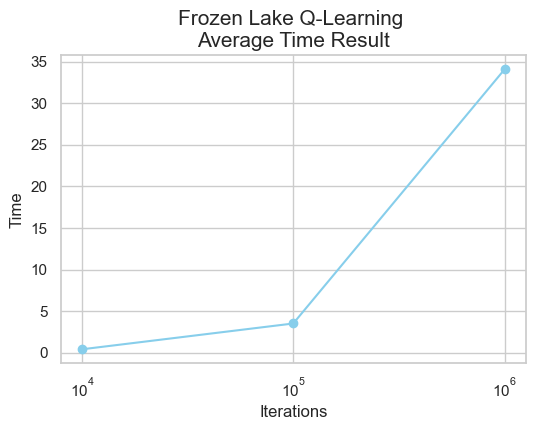

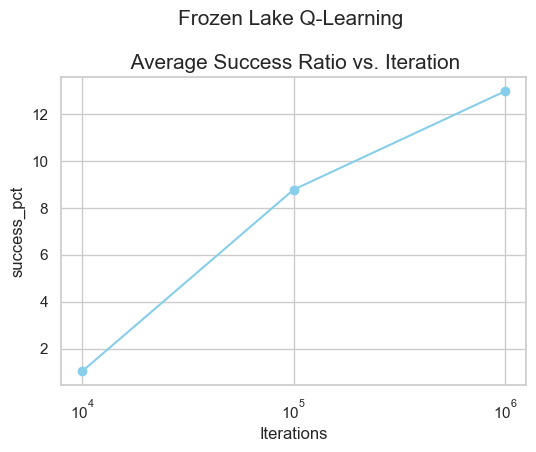

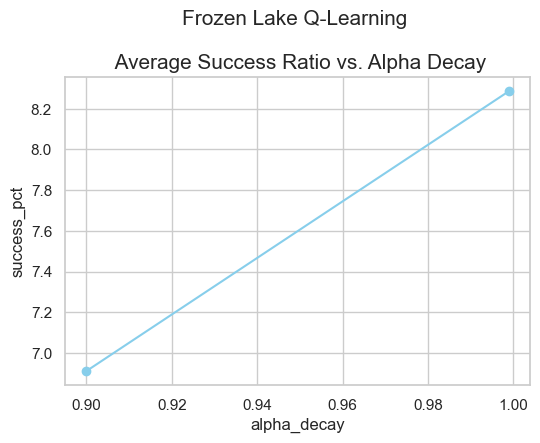

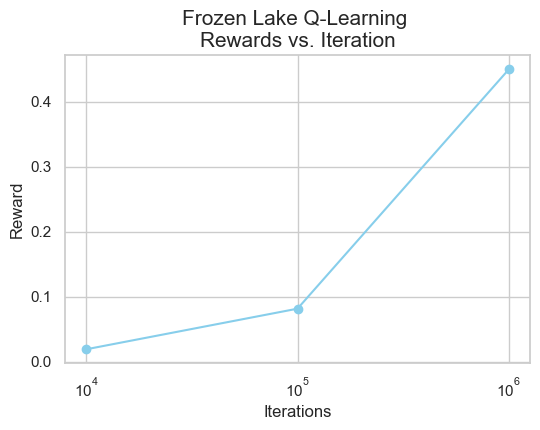

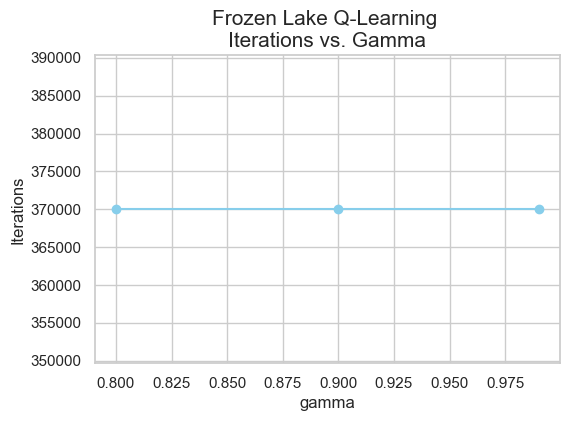

In [73]:
interest = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'Iterations', 'Reward', 'Time', 'success_pct']
ql_df = q_learn[interest]

mode = 'Frozen Lake Q-Learning \n'
ql_plot_result(ql_df, interest, 'Iterations', 'Time', title=mode+'Average Time Result', logscale=True)
ql_plot_result(ql_df, interest, 'Iterations', 'success_pct', title=mode+'\n Average Success Ratio vs. Iteration', logscale=True)
ql_plot_result(ql_df, interest, 'alpha_decay', 'success_pct', title=mode+'\n Average Success Ratio vs. Alpha Decay')
ql_plot_result(ql_df, interest, 'Iterations', 'Reward', title=mode+'Rewards vs. Iteration', logscale=True)
ql_plot_result(ql_df, interest, 'gamma', 'Iterations', title=mode+'Iterations vs. Gamma')

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/var/folders/g4/649czy952rs1q6b1tggtkh5c0000gn/T/ipykernel_23750/1504482281.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ql_corr, dtype=np.bool))


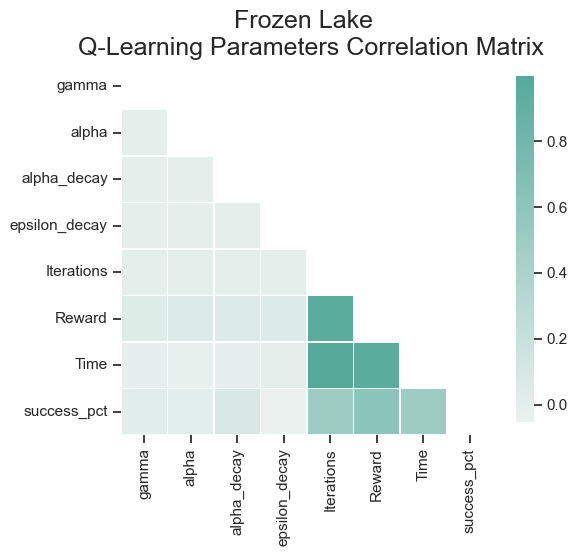

In [13]:
ql_corr = ql_df.corr()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Frozen Lake \n Q-Learning Parameters Correlation Matrix', fontsize=18)
mask = np.triu(np.ones_like(ql_corr, dtype=np.bool))
cmap = sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(ql_corr, mask=mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":.75})


Best Result:
	Success = 42.20
	Gamma = 0.99,
	Alpha = 0.01,
	Alpha Decay: 0.999,
	Epsilon Decay: 0.900,
	Iterations: 1.0E+06


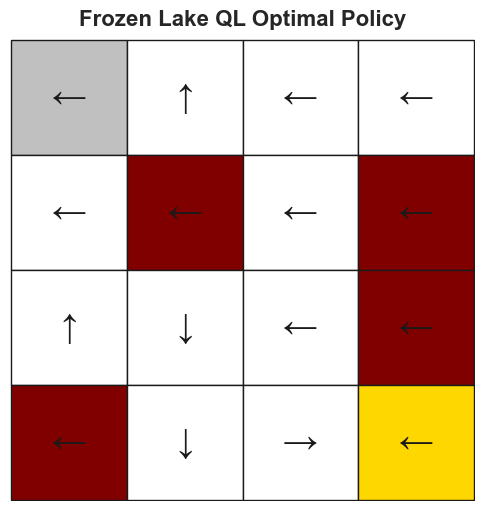

In [14]:
bestRun = q_learn['success_pct'].argmax()
best_policy = q_learn['policy'][bestRun]
best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(rows, cols)

# plot the policy
title='Frozen Lake QL Optimal Policy'
plot_lake(lake_env, best_policy, title)

print('Best Result:\n\tSuccess = %.2f\n\tGamma = %.2f,\n\tAlpha = %.2f,\n\tAlpha Decay: %.3f,\n\tEpsilon Decay: %.3f,\n\tIterations: %.1E' 
      % (q_learn['success_pct'].max(), 
         q_learn['gamma'][bestRun], 
         q_learn['alpha'][bestRun], 
         q_learn['alpha_decay'][bestRun], 
         q_learn['epsilon_decay'][bestRun], 
         q_learn['Iterations'][bestRun]))

In [69]:
q_learn['Time'][bestRun]

37.413727045059204

## Forest

In [74]:
T,R = hiive.mdptoolbox.example.forest(S=625)

Value Iteration

In [103]:
gammas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]
value_iter_2  = valueIteration_v2(T, R, gammas, epsilons, showResults=False)
policies = value_iter_2['policy']

Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.00,	2,	4.360000
0.10,	1E-04,	0.00,	4,	4.396306
0.10,	1E-06,	0.00,	6,	4.396610
0.10,	1E-10,	0.01,	10,	4.396613
0.10,	1E-12,	0.01,	12,	4.396613
0.10,	1E-14,	0.00,	14,	4.396613
0.20,	1E-02,	0.00,	3,	4.853200
0.20,	1E-04,	0.00,	6,	4.882516
0.20,	1E-06,	0.00,	9,	4.882698
0.20,	1E-10,	0.00,	14,	4.882699
0.20,	1E-12,	0.01,	17,	4.882699
0.20,	1E-14,	0.01,	19,	4.882699
0.40,	1E-02,	0.00,	6,	6.262393
0.40,	1E-04,	0.00,	10,	6.277290
0.40,	1E-06,	0.00,	15,	6.277571
0.40,	1E-10,	0.01,	24,	6.277574
0.40,	1E-12,	0.01,	29,	6.277574
0.40,	1E-14,	0.01,	33,	6.277574
0.60,	1E-02,	0.00,	11,	8.797055
0.60,	1E-04,	0.01,	18,	8.809758
0.60,	1E-06,	0.00,	26,	8.809991
0.60,	1E-10,	0.01,	41,	8.809994
0.60,	1E-12,	0.01,	48,	8.809994
0.60,	1E-14,	0.01,	56,	8.809994
0.80,	1E-02,	0.01,	23,	14.863209
0.80,	1E-04,	0.01,	37,	14.883040
0.80,	1E-06,	0.02,	51,	14.883693
0.80,	1E-10,	0.02,	79,	14.88

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/

--------------------------------------------------
Avg_Rewards_vs_Gamma 
 [4.390458943943552, 4.87775205665035, 6.274995934126277, 8.80779790896495, 14.880184141396134, 23.15722870555906, 71.53667191714435]
--------------------------------------------------
Avg_time 
 [0.0036776463190714517, 0.0039274295171101885, 0.005789438883463542, 0.006986776987711589, 0.016862034797668457, 0.021461844444274902, 0.04723485310872396]
--------------------------------------------------
Avg_iter 
 [8.0, 11.333333333333334, 19.5, 33.333333333333336, 65.0, 104.83333333333333, 212.0]
--------------------------------------------------


<Figure size 1200x1200 with 0 Axes>

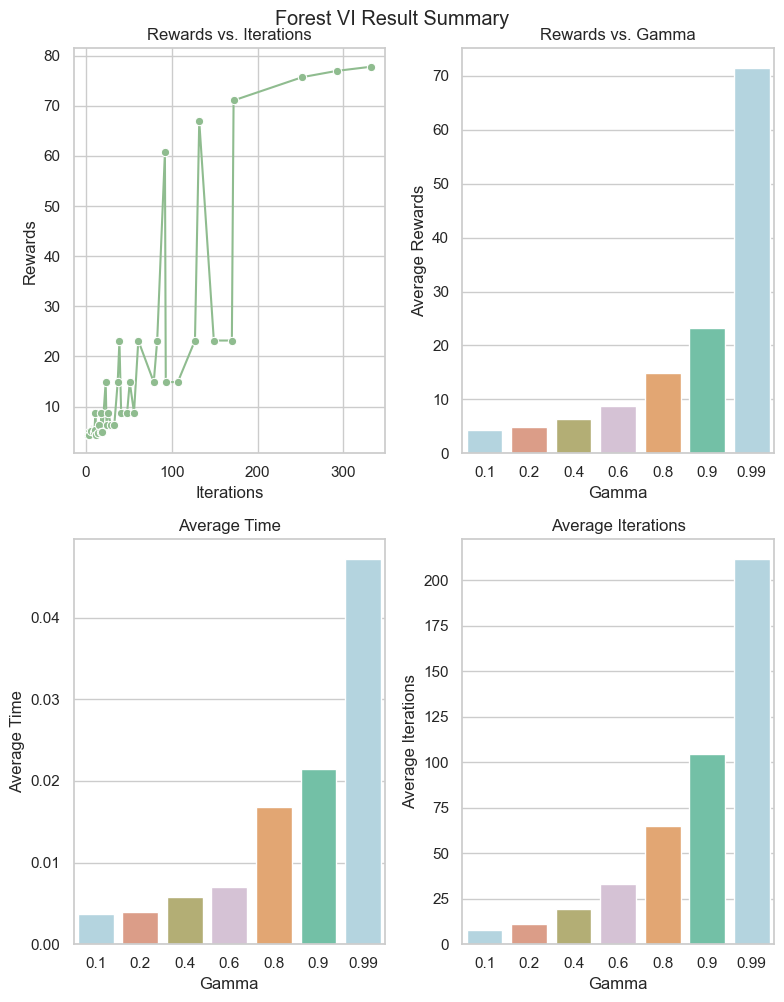

In [104]:
target_name = "Forest VI Result Summary"
model = 'VI'
result_plots_2(model, target_name, value_iter_2, gammas, policy_iter = None)
# sns.lineplot(x=value_iter_2['iterations'], y=value_iter_2['reward'], color = 'yellowgreen', marker = 'o')

Best Result:
	Reward = 77.81
	Gamma = 0.9900000
	Epsilon= 1E-14


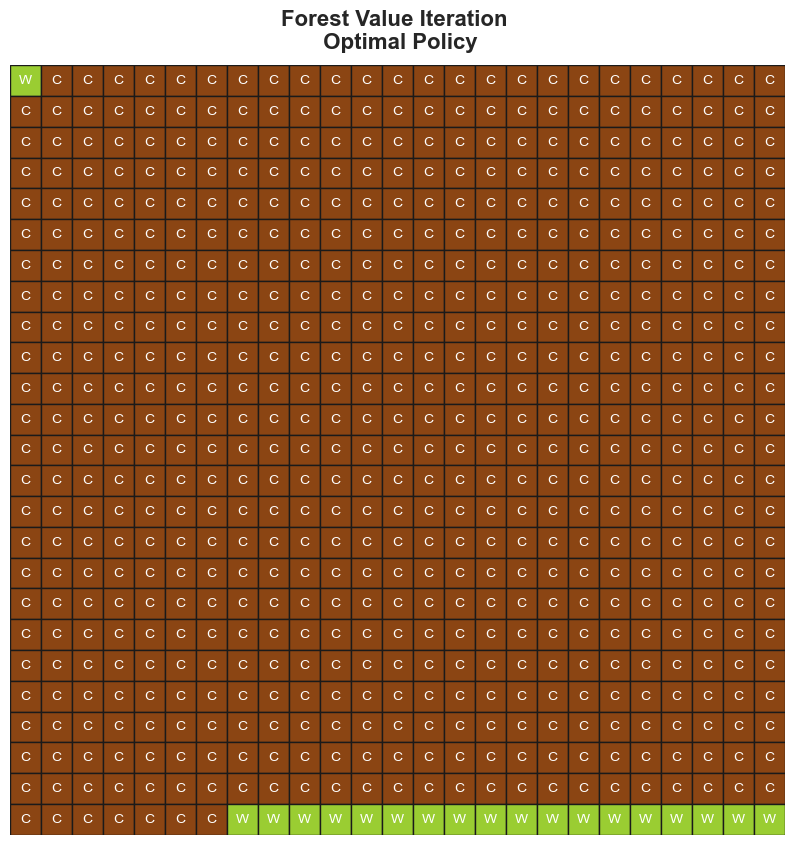

In [105]:
# find the highest score
bestRun = value_iter_2['reward'].argmax()
bestPolicy = value_iter_2['policy'][bestRun]

title='Forest Value Iteration \n Optimal Policy'
plot_forest(bestPolicy, title)
print('Best Result:\n\tReward = %.2f\n\tGamma = %.7f\n\tEpsilon= %.E' % (value_iter_2['reward'].max(), value_iter_2['gamma'][bestRun], value_iter_2['epsilon'][bestRun]))

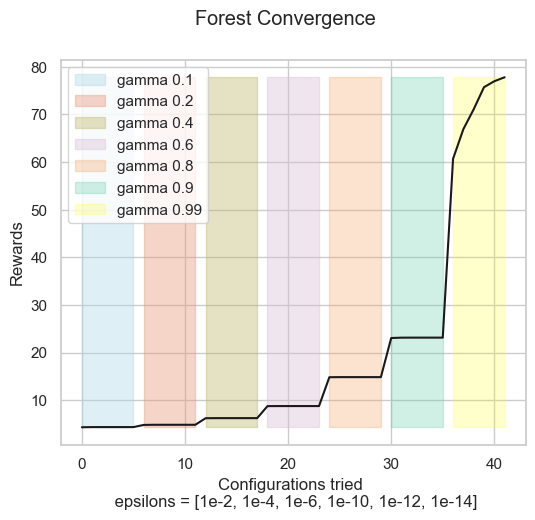

In [118]:
target = value_iter_2['reward']
custom_color = ['lightblue','darksalmon', 'darkkhaki', 'thistle', 'sandybrown', 'mediumaquamarine', 'yellow']
# gammas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
plt.figure(figsize=(6,5))
plt.plot(target, color = 'k')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.1),  alpha=0.4, color =custom_color[0], label = 'gamma 0.1')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.2),  alpha=0.4, color =custom_color[1], label = 'gamma 0.2')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.4),  alpha=0.4, color =custom_color[2], label = 'gamma 0.4')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.6),  alpha=0.4, color =custom_color[3], label = 'gamma 0.6')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.8),  alpha=0.3, color =custom_color[4], label = 'gamma 0.8')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.9),  alpha=0.3, color =custom_color[5], label = 'gamma 0.9')
plt.fill_between(range(len(target)), min(target), max(target), where=(value_iter_2['gamma'] == 0.99),  alpha=0.2, color =custom_color[6], label = 'gamma 0.99')
plt.suptitle("Forest Convergence") 
plt.xlabel('Configurations tried \n epsilons = [1e-2, 1e-4, 1e-6, 1e-10, 1e-12, 1e-14]')
plt.ylabel('Rewards')
plt.legend()


Policy Iteration

In [106]:
gammas   = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
policy_iter_2  = policyIteration_v2(T, R, gammas)

gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.04,	1,	4.396613
0.20,	0.02,	1,	4.882699
0.40,	0.03,	2,	6.277574
0.60,	0.05,	3,	8.809994
0.80,	0.09,	6,	14.883721
0.90,	0.13,	10,	23.172434
0.99,	0.25,	18,	79.492429
Time taken: 0.64


/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/

--------------------------------------------------
Avg_Rewards_vs_Gamma 
 [4.396612561750176, 4.882699462587847, 6.277573529411765, 8.809994353472616, 14.883720930232563, 23.172433847048566, 79.49242913074468]
--------------------------------------------------
Avg_time 
 [0.03672909736633301, 0.015357017517089844, 0.030099868774414062, 0.04637908935546875, 0.0930790901184082, 0.12883996963500977, 0.24869132041931152]
--------------------------------------------------
Avg_iter 
 [1.0, 1.0, 2.0, 3.0, 6.0, 10.0, 18.0]
--------------------------------------------------


<Figure size 1200x1200 with 0 Axes>

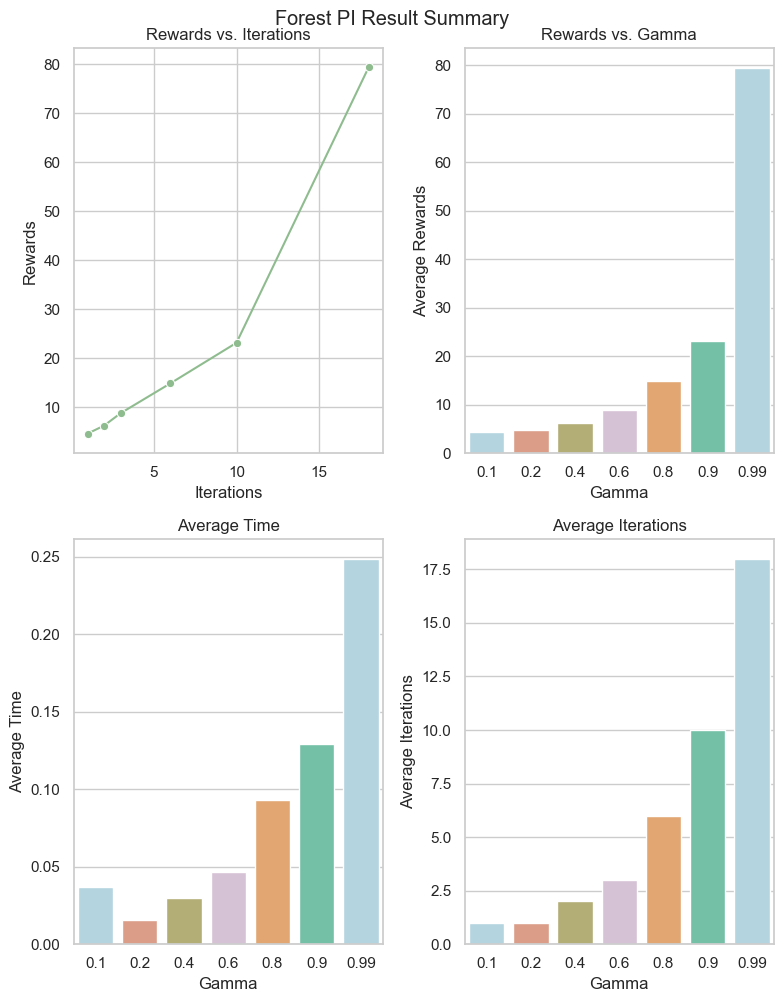

In [107]:
target_name = "Forest PI Result Summary"
model = 'PI'
result_plots_2(model, target_name, value_iter_2, gammas, policy_iter = policy_iter_2)

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0, 0.5, 'Rewards')

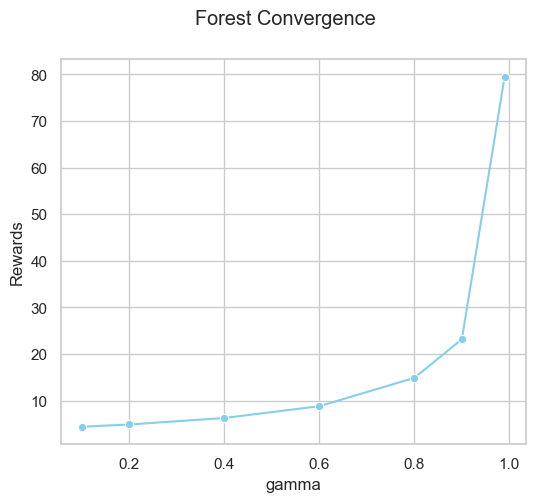

In [124]:
target = policy_iter_2['reward']
plt.figure(figsize=(6,5))
sns.set(style="whitegrid")
sns.lineplot(x = policy_iter_2['gamma'], y = target, color = 'skyblue', marker = 'o')
plt.suptitle("Forest Convergence") 
plt.ylabel('Rewards')

Best Result:
	Reward = 79.49
	Gamma = 0.990


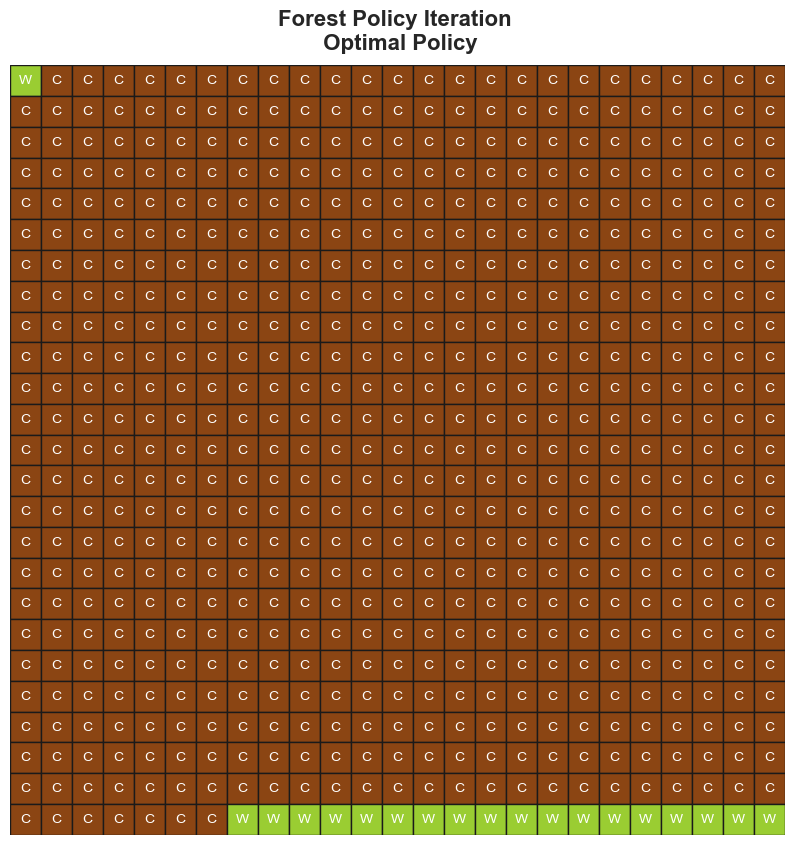

In [109]:
# find the highest score
bestRun = policy_iter_2['reward'].argmax()
bestPolicy = policy_iter_2['policy'][bestRun]

title='Forest Policy Iteration \n Optimal Policy'
plot_forest(bestPolicy, title)
print('Best Result:\n\tReward = %.2f\n\tGamma = %.3f' % (policy_iter_2['reward'].max(), policy_iter_2['gamma'][bestRun]))

Q-Learning

In [91]:
gammas         = [0.8, 0.9, 0.99]
alphas         = [0.01, 0.1, 0.2]
alpha_decays   = [0.9, 0.999]
epsilon_decays = [0.9, 0.999]
iterations     = [1e4, 1e5, 1e6]
# gammas         = [0.9, 0.99]
# alphas         = [0.1, 0.2]
# alpha_decays   = [0.999]
# epsilon_decays = [0.999]
# iterations     = [1e5]

In [92]:
q_learn_2  = Q_learning_v2(T, R, gammas, alphas, alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)


Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:10000
0.80,	0.01,	0.80,	10000,	1.645105
Test Num 2/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.80,	0.01,	6.18,	100000,	2.675314
Test Num 3/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:1000000
0.80,	0.01,	59.30,	1000000,	2.676504
Test Num 4/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:10000
0.80,	0.01,	0.64,	10000,	1.614038
Test Num 5/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:100000
0.80,	0.01,	5.70,	100000,	2.676405
Test Num 6/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:1000000
0.80,	0.01,	60.51,	1000000,	2.676916
Test Num 7/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.999,	Epsilon Decay:0.900,

In [110]:
q_learn_2.head()

,gamma,alpha,alpha_decay,epsilon_decay,iterations,time,reward,average_steps,steps_stddev,success_pct,policy,mean_rewards,max_rewards,error
0,0.8,0.01,0.9,0.900,10000.0,0.801965,1.645105,0.0,0.0,0.0,"{(0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...","{(0.0, 0.0, 1.2960000000000001e-05, 1.29600000...","{(0.0, 0.0, 0.008100000000000001, 0.0081000000...","{(0.0, 0.0, 0.008100000000000001, 0.0, 0.0, 0...."
1,0.8,0.01,0.9,0.900,100000.0,6.176189,2.675314,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,...","{(2.2198727824000002e-05, 2.8246364897914456e-...","{(0.01, 0.01, 0.01, 0.01, 0.01, 0.012922542853...","{(0.003874204890000002, 0.0, 7.999999991367979..."
2,0.8,0.01,0.9,0.900,1000000.0,59.300598,2.676504,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,...","{(9.158311647382145e-05, 0.0001598598620525426...","{(0.03344920573670061, 0.0714058027365791, 0.1...","{(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,0.8,0.01,0.9,0.999,10000.0,0.640168,1.614038,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,...","{(1.6e-05, 1.6e-05, 1.6e-05, 1.6e-05, 1.6e-05,...","{(0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0....","{(0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,0.8,0.01,0.9,0.999,100000.0,5.701067,2.676405,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,...","{(4.414624842140743e-05, 5.5227135194601985e-0...","{(0.01315203403390335, 0.01688795420267145, 0....","{(4.039885488156244e-05, 1.800589898452232e-05..."


In [94]:
# Look at correlation matrix
interest = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'iterations', 'reward', 'time']

# pick out hyperparameters and how succesful they were
ql_df_2 = q_learn_2[interest]

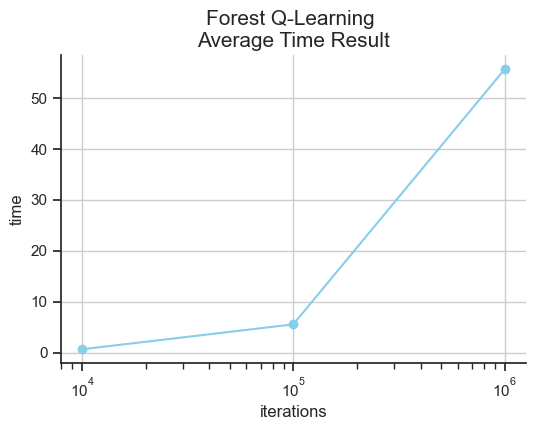

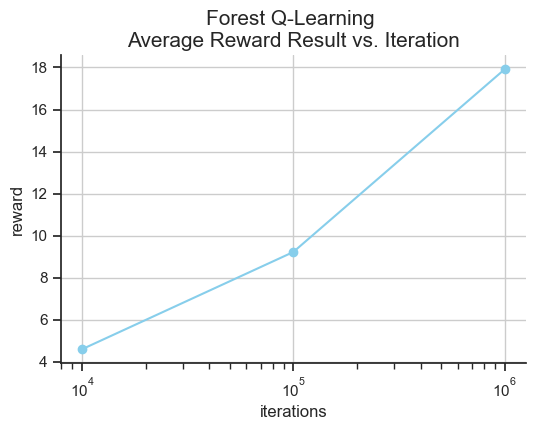

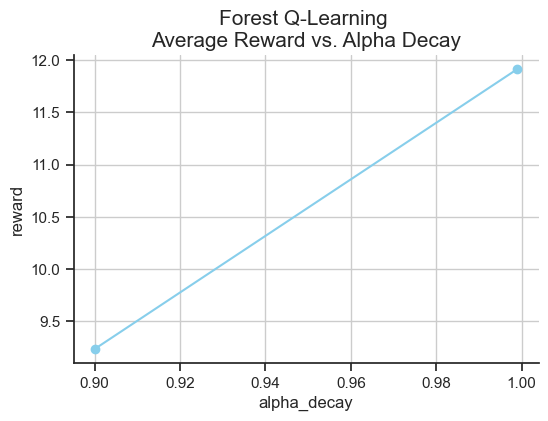

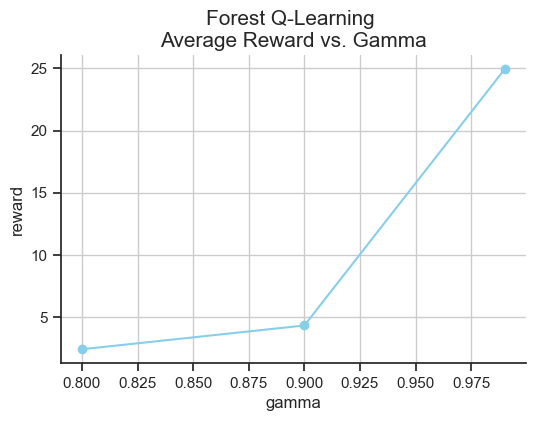

In [99]:
mode = 'Forest Q-Learning \n'
ql_plot_result(ql_df_2, interest,  'iterations', 'time', title=mode +'Average Time Result', logscale=True)
ql_plot_result(ql_df_2, interest, 'iterations', 'reward', title=mode+'Average Reward Result vs. Iteration', logscale=True)
ql_plot_result(ql_df_2, interest, 'alpha_decay', 'reward', title=mode+'Average Reward vs. Alpha Decay')
ql_plot_result(ql_df_2, interest,'gamma', 'reward', title=mode+'Average Reward vs. Gamma')

# ql_plot_result(ql_df_2, interest, 'iterations', 'time', title=mode+'Average Time Result', logscale=True)
# ql_plot_result(ql_df_2, interest, 'iterations', 'success_pct', title=mode+'\n Average Success Ratio vs. Iteration', logscale=True)
# ql_plot_result(ql_df_2, interest, 'alpha_decay', 'success_pct', title=mode+'\n Average Success Ratio vs. Alpha Decay')
# ql_plot_result(ql_df_2, interest, 'iterations', 'reward', title=mode+'Rewards vs. Iteration', logscale=True)
# ql_plot_result(ql_df_2, interest, 'gamma', 'iterations', title=mode+'Iterations vs. Gamma')

/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/irenekim/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/var/folders/g4/649czy952rs1q6b1tggtkh5c0000gn/T/ipykernel_23750/449539452.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ql_corr_2, dtype=np.bool))


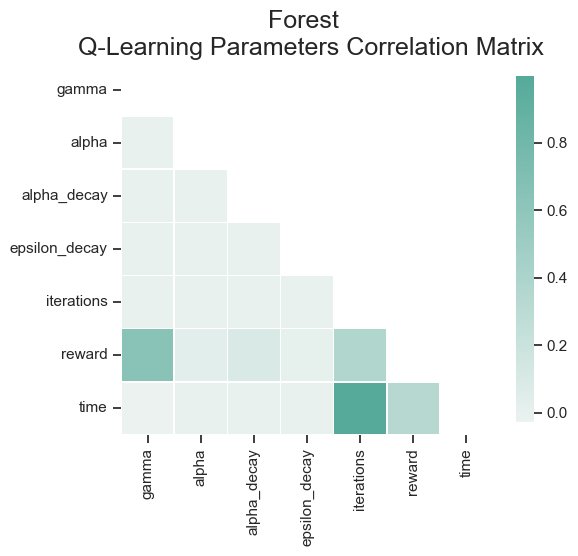

In [96]:
ql_corr_2 = ql_df_2.corr()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Forest \n Q-Learning Parameters Correlation Matrix', fontsize=18)
mask = np.triu(np.ones_like(ql_corr_2, dtype=np.bool))
cmap = sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(ql_corr_2, mask=mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":.75})

Best Result:
	Reward = 47.41
	Gamma = 0.99,
	Alpha = 0.20,
	Alpha Decay: 0.999,
	Epsilon Decay: 0.900,
	Iterations: 1.0E+06


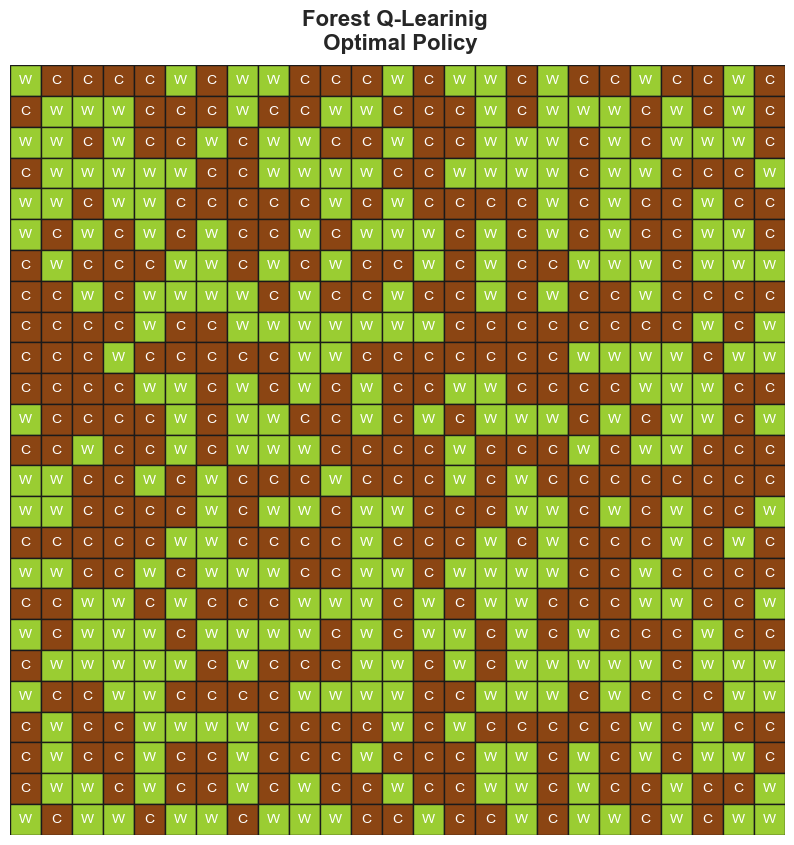

In [97]:
# Plot most successful gamma
# find the score with the highest success percentage and get its policy
bestRun = q_learn_2['reward'].argmax()
best_policy = q_learn_2['policy'][bestRun]
best_policy = np.array(list(best_policy)[0])
best_policy = best_policy.reshape(25, 25)

# plot the policy
title='Forest Q-Learinig \n Optimal Policy'
plot_forest(best_policy, title)

print('Best Result:\n\tReward = %.2f\n\tGamma = %.2f,\n\tAlpha = %.2f,\n\tAlpha Decay: %.3f,\n\tEpsilon Decay: %.3f,\n\tIterations: %.1E' 
      % (q_learn_2['reward'].max(), 
         q_learn_2['gamma'][bestRun], 
         q_learn_2['alpha'][bestRun], 
         q_learn_2['alpha_decay'][bestRun], 
         q_learn_2['epsilon_decay'][bestRun], 
         q_learn_2['iterations'][bestRun]))
